## House Price Prediction 


Steps: 
- Data exploration
- Data cleaning 
- Data preparation and conduct polynomial trial to find right fold value
- Model building and evaluation
- Inference


In [241]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [242]:
#Reading data
df0 = pd.read_csv('SurpriseHousing.csv')
df0.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Basic cleanup
- Replacing NaN
- Dropping Id column
- Null analysis followed by dropping fields with lot of null values
- Dropping rows where few columns have null values

In [244]:
#Replacing NaN
df0.replace(np.nan,'')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,,Reg,Lvl,AllPub,...,0,,,,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,,Reg,Lvl,AllPub,...,0,,,,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,,IR1,Lvl,AllPub,...,0,,,,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,,IR1,Lvl,AllPub,...,0,,,,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,,IR1,Lvl,AllPub,...,0,,,,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,,Reg,Lvl,AllPub,...,0,,,,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,,Reg,Lvl,AllPub,...,0,,MnPrv,,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,,Reg,Lvl,AllPub,...,0,,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,,Reg,Lvl,AllPub,...,0,,,,0,4,2010,WD,Normal,142125


In [245]:
#Dropping Id field
df0.drop_duplicates(subset=None, keep="first", inplace=False)

df0.drop(['Id'], axis=1, inplace=True)

In [246]:
# Shape

df0.shape

(1460, 80)

In [247]:
#Null analysis
df0.columns[df0.isnull().any()] 

null_df = df0.isnull().sum()/len(df0)*100
null_df = null_df[null_df>0]
null_df.sort_values(inplace=True, ascending=False)
null_df

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [248]:
#Drop fields with lot of null values
df0.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace = True)


In [249]:
#Few columns have higher null count. 
#We will not drop these columns because they seem important after referring data dictionary.
#For these we will remove the corresponding rows

index = df0[ (df0['LotFrontage'].isnull()==True) | (df0['GarageType'].isnull()==True) | (df0['GarageYrBlt'].isnull()==True) | (df0['GarageFinish'].isnull()==True) | (df0['GarageQual'].isnull()==True) | (df0['GarageCond'].isnull()==True)].index

df0.drop(index , inplace=True)


In [250]:
#Verfifying - Null analysis
df0.columns[df0.isnull().any()] 

null_df = df0.isnull().sum()/len(df0)*100
null_df = null_df[null_df>0]
null_df.sort_values(inplace=True, ascending=False)
null_df

BsmtExposure    2.218279
BsmtFinType2    2.218279
BsmtQual        2.129547
BsmtCond        2.129547
BsmtFinType1    2.129547
MasVnrType      0.532387
MasVnrArea      0.532387
Electrical      0.088731
dtype: float64

### Correlation Analysis, Transformation, Outlier Analysis and Removing unnecessary Categorical fields

- Check correlation with Sale Price
- Delete field that have small correlation (both +ve and -ve)
- Heatmap to identify strongly correlated fields. Delete the redundant fields
- Transformation of Sale Price if required
- Check categorical fields

In [251]:
#Check correlation with SalePrice
data_numeric = df0.select_dtypes(include=['float64', 'int64'])

cor = data_numeric.corr()
cor['SalePrice'].sort_values(ascending=True)


EnclosedPorch   -0.155354
KitchenAbvGr    -0.140544
OverallCond     -0.125475
MSSubClass      -0.089628
BsmtHalfBath    -0.037232
MiscVal         -0.036395
BsmtFinSF2      -0.028956
YrSold          -0.015792
LowQualFinSF    -0.001897
3SsnPorch        0.030182
MoSold           0.053385
PoolArea         0.091722
ScreenPorch      0.108755
BedroomAbvGr     0.161764
BsmtUnfSF        0.211691
BsmtFullBath     0.238869
HalfBath         0.271148
LotArea          0.299455
2ndFlrSF         0.302984
WoodDeckSF       0.336877
LotFrontage      0.345879
OpenPorchSF      0.348681
BsmtFinSF1       0.393166
Fireplaces       0.460463
MasVnrArea       0.488658
GarageYrBlt      0.504690
YearRemodAdd     0.520913
YearBuilt        0.525195
TotRmsAbvGrd     0.544031
FullBath         0.565315
1stFlrSF         0.609671
TotalBsmtSF      0.617345
GarageArea       0.620812
GarageCars       0.648035
GrLivArea        0.704202
OverallQual      0.799069
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [252]:
#Drop field with week correlation
df0.drop(['BsmtHalfBath','MiscVal','BsmtFinSF2','LowQualFinSF','3SsnPorch','MoSold'],axis=1,inplace = True)

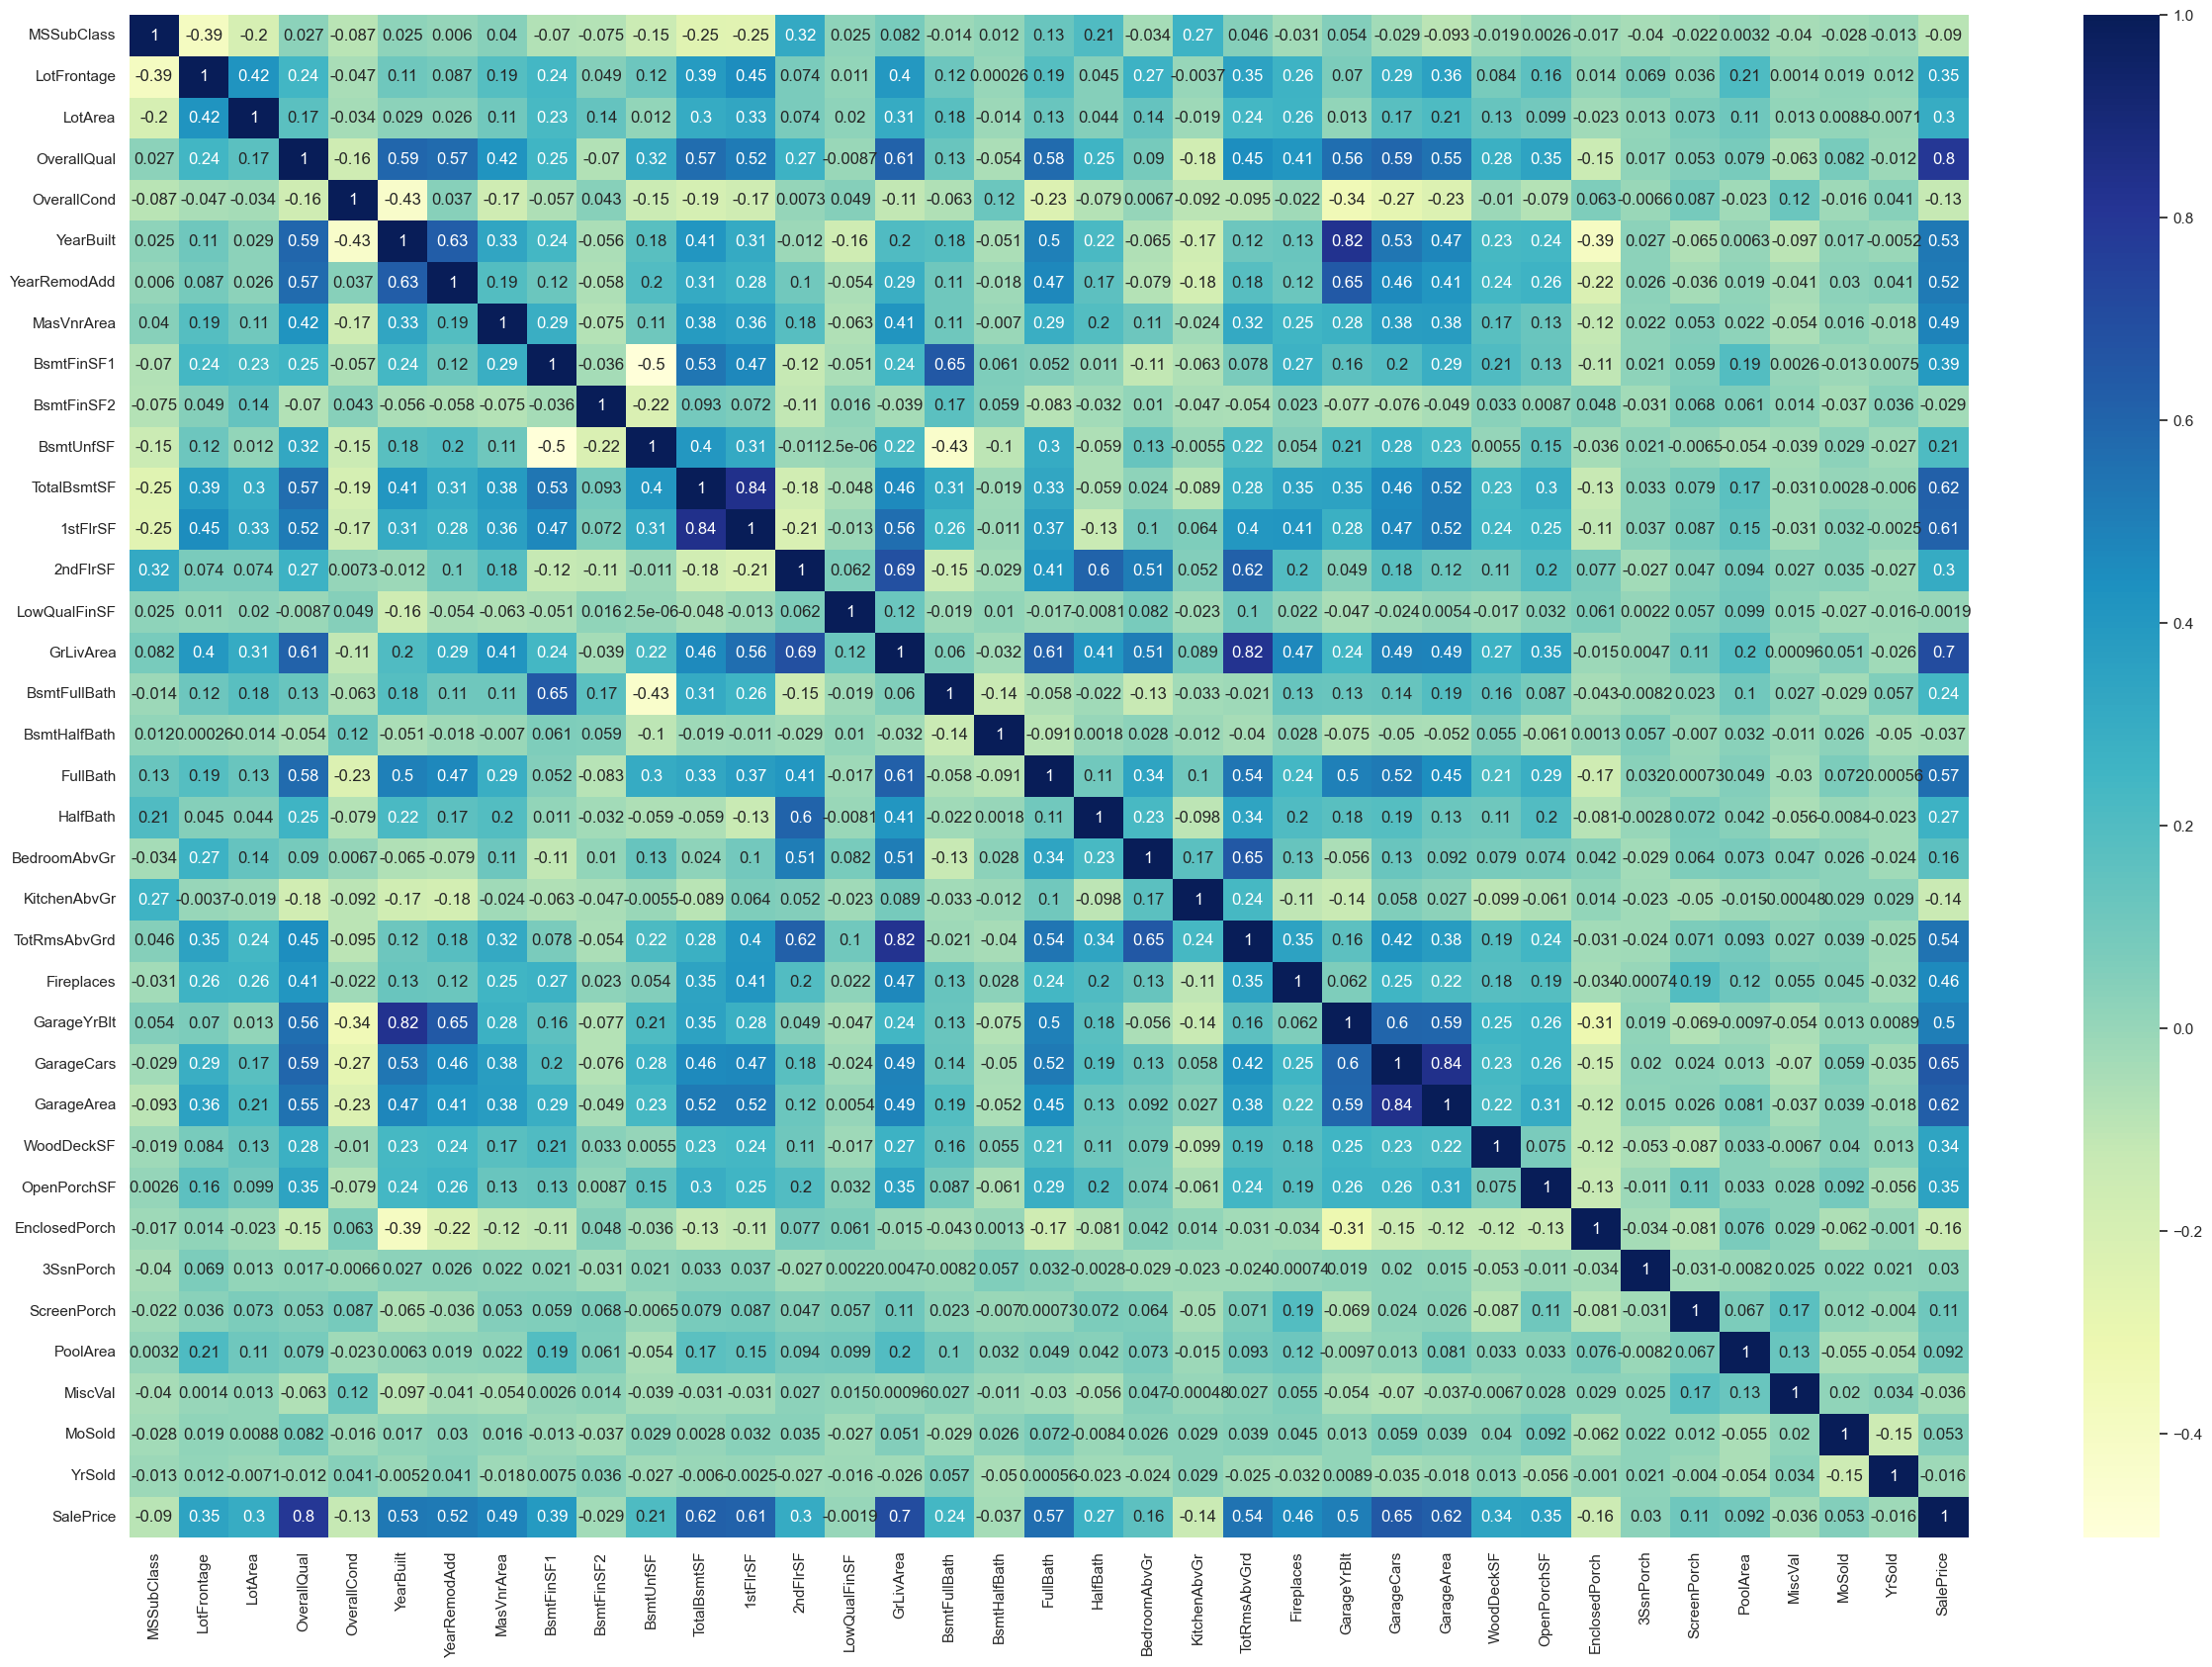

In [253]:
#Heatmap to identify strongly correlated fields


plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [254]:
# Drop fields that are strongly correlated

df0.drop(['GarageYrBlt','1stFlrSF','GrLivArea','GarageCars'],axis=1,inplace = True)

<Axes: xlabel='SalePrice', ylabel='Density'>

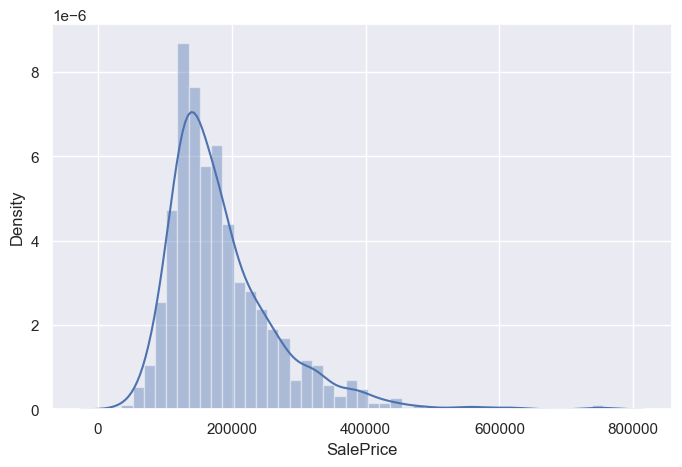

In [255]:
# Check if transformation is required
sns.distplot(df0['SalePrice'])

In [256]:
#Try Log Transformation
df0['SalePrice']=np.log1p(df0['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

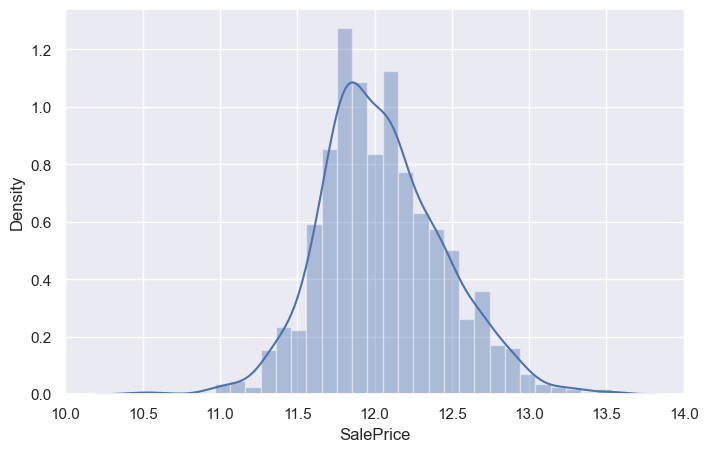

In [257]:
sns.distplot(df0['SalePrice'])

<Figure size 800x500 with 0 Axes>

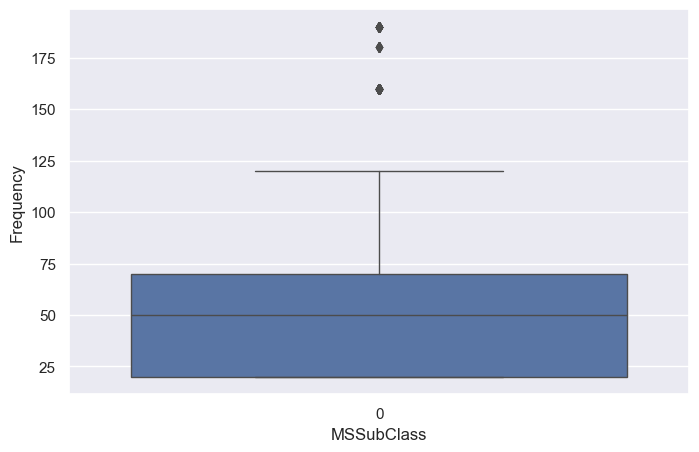

<Figure size 800x500 with 0 Axes>

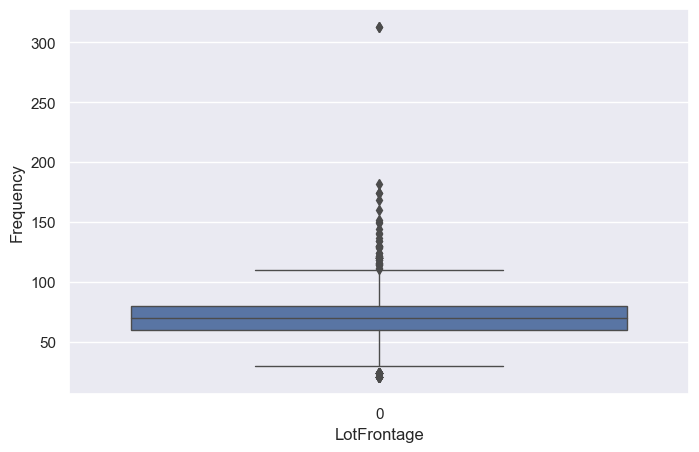

<Figure size 800x500 with 0 Axes>

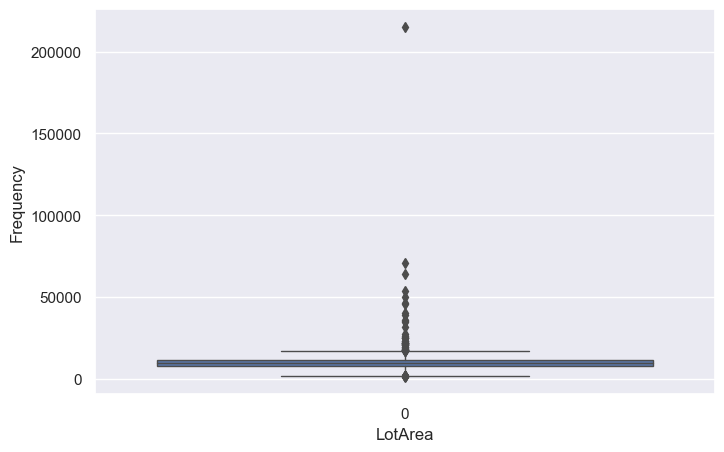

<Figure size 800x500 with 0 Axes>

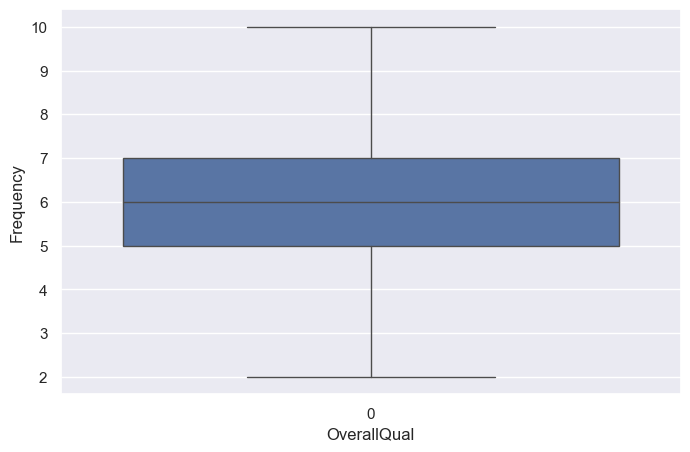

<Figure size 800x500 with 0 Axes>

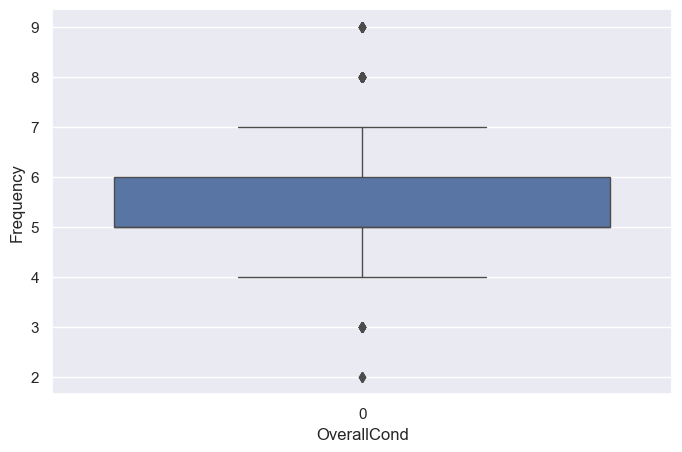

<Figure size 800x500 with 0 Axes>

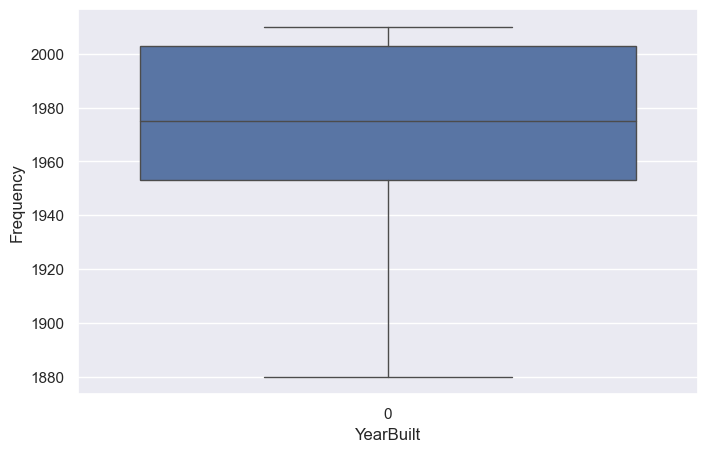

<Figure size 800x500 with 0 Axes>

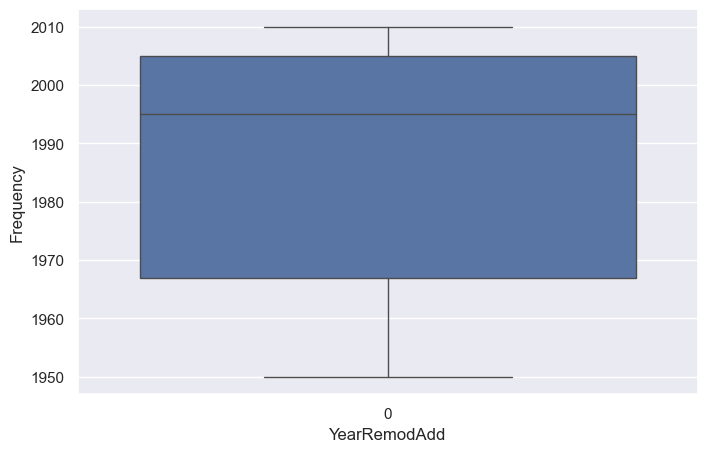

<Figure size 800x500 with 0 Axes>

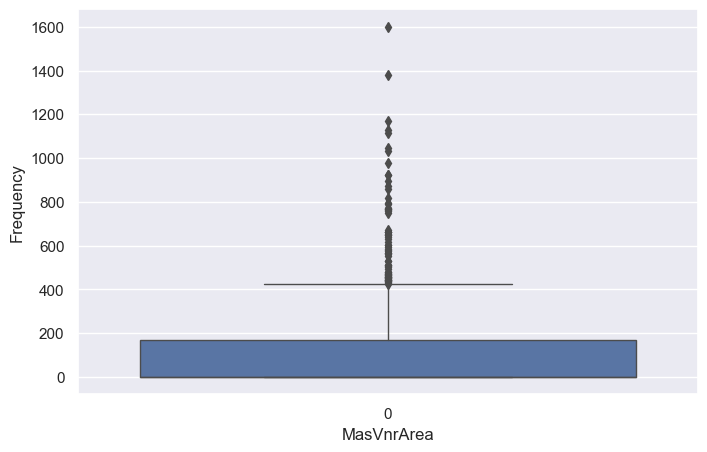

<Figure size 800x500 with 0 Axes>

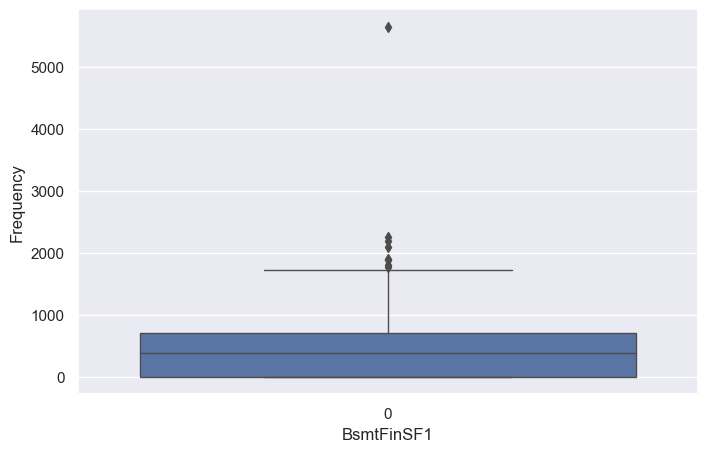

<Figure size 800x500 with 0 Axes>

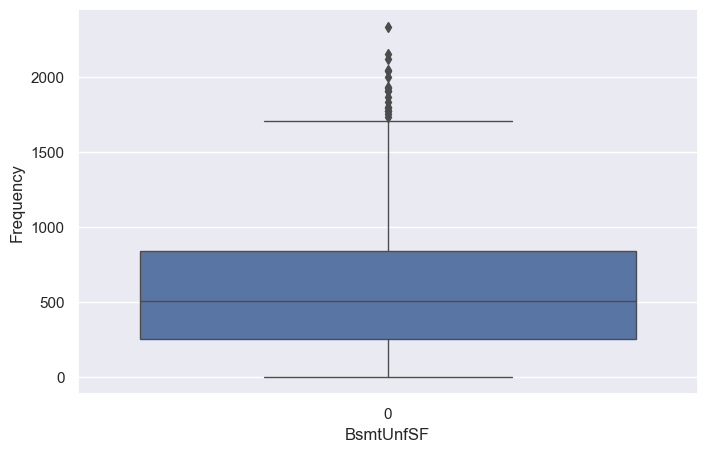

<Figure size 800x500 with 0 Axes>

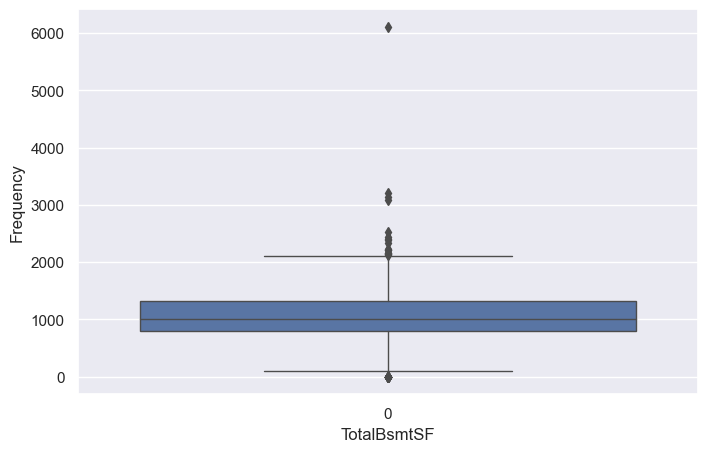

<Figure size 800x500 with 0 Axes>

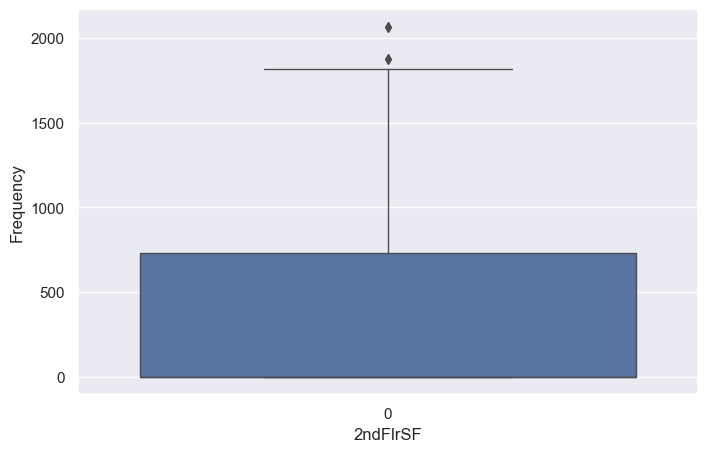

<Figure size 800x500 with 0 Axes>

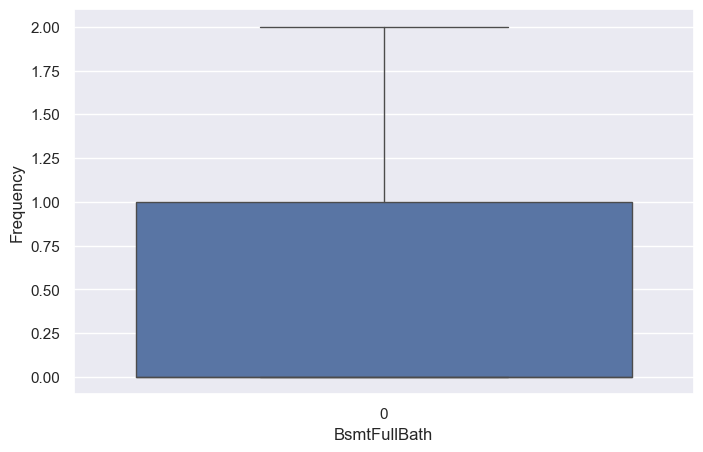

<Figure size 800x500 with 0 Axes>

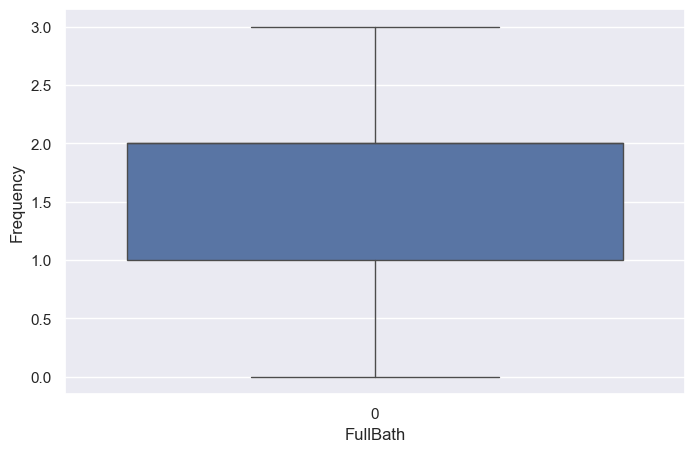

<Figure size 800x500 with 0 Axes>

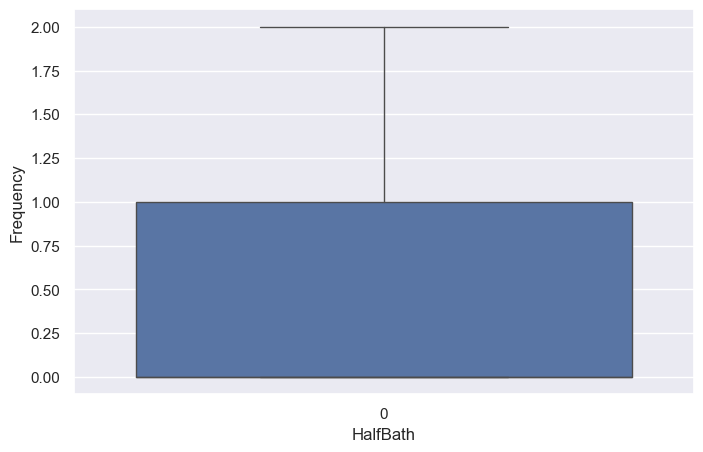

<Figure size 800x500 with 0 Axes>

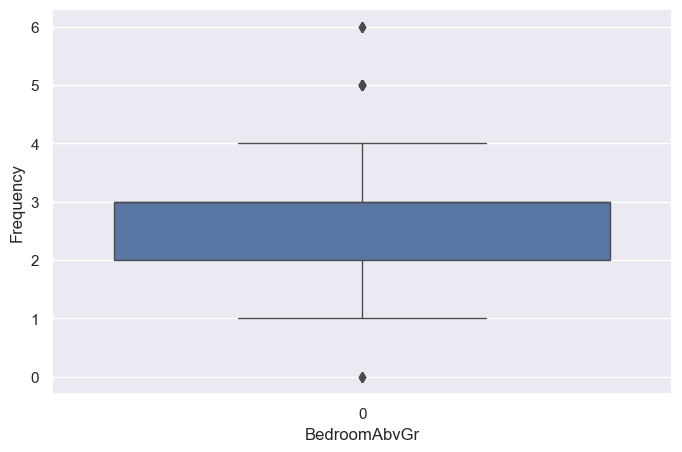

<Figure size 800x500 with 0 Axes>

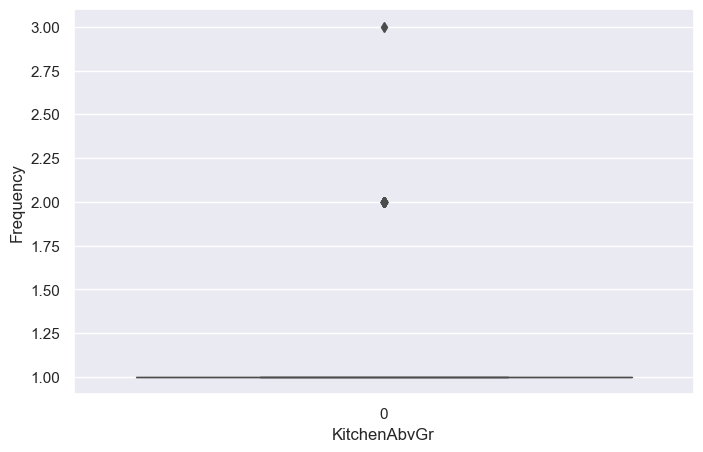

<Figure size 800x500 with 0 Axes>

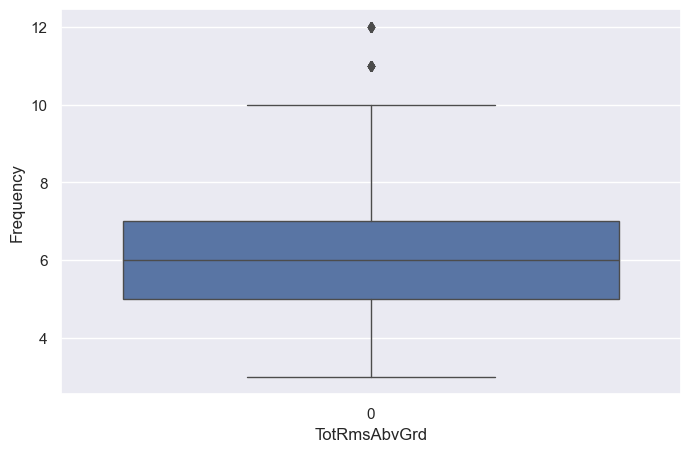

<Figure size 800x500 with 0 Axes>

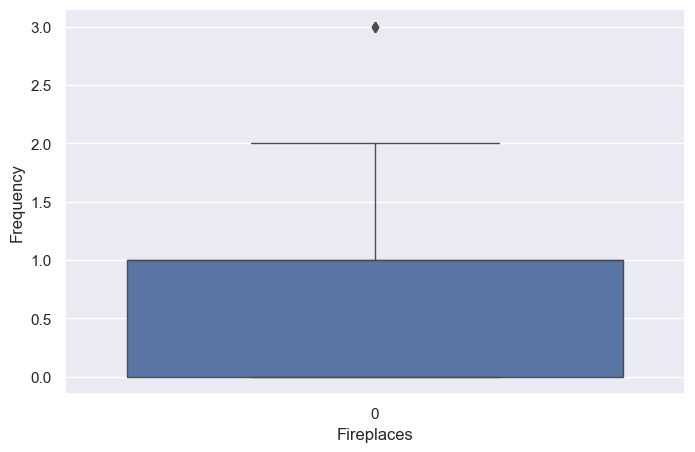

<Figure size 800x500 with 0 Axes>

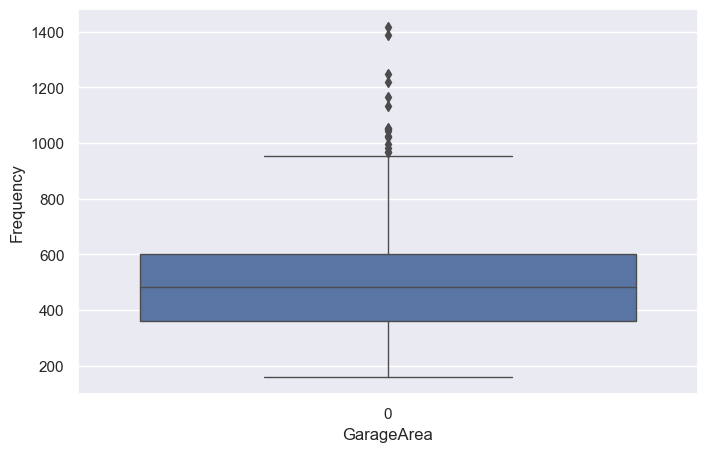

<Figure size 800x500 with 0 Axes>

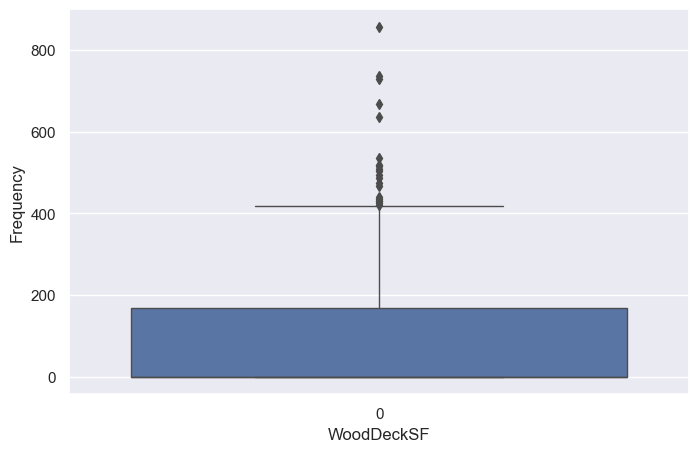

<Figure size 800x500 with 0 Axes>

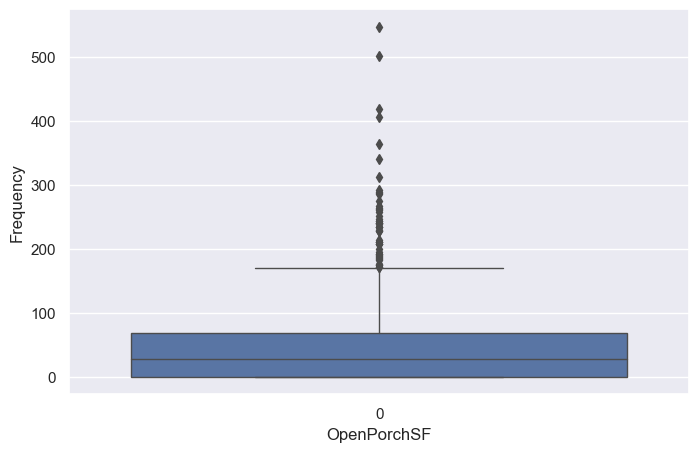

<Figure size 800x500 with 0 Axes>

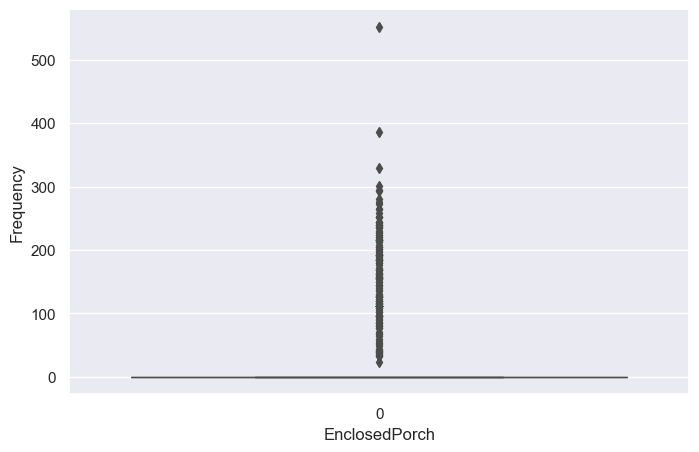

<Figure size 800x500 with 0 Axes>

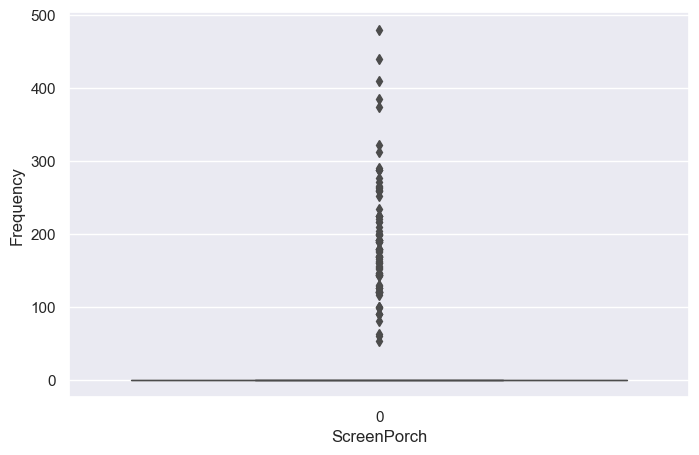

<Figure size 800x500 with 0 Axes>

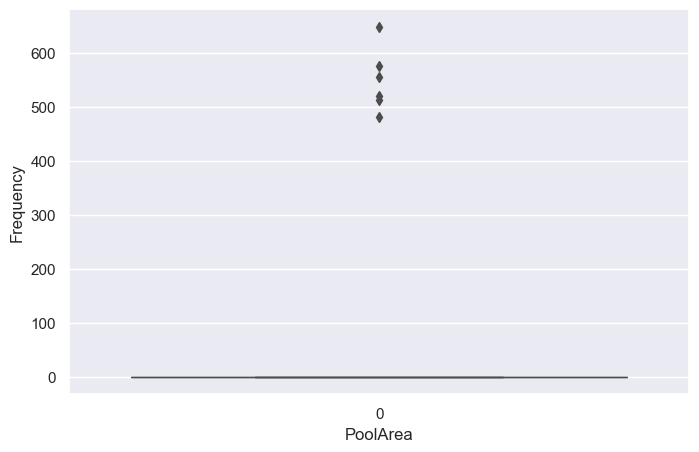

<Figure size 800x500 with 0 Axes>

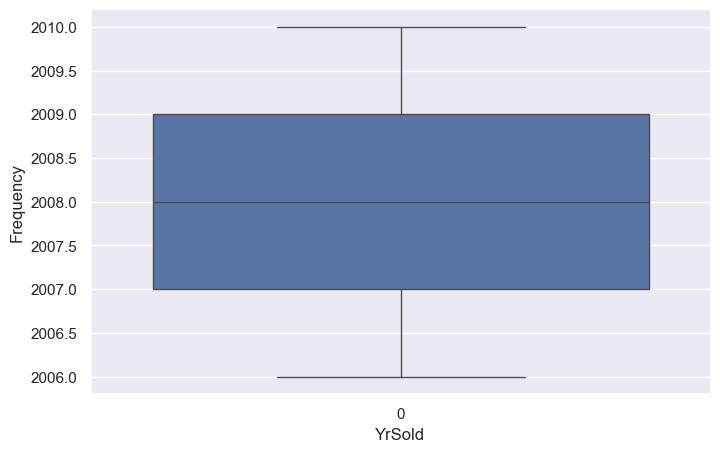

<Figure size 800x500 with 0 Axes>

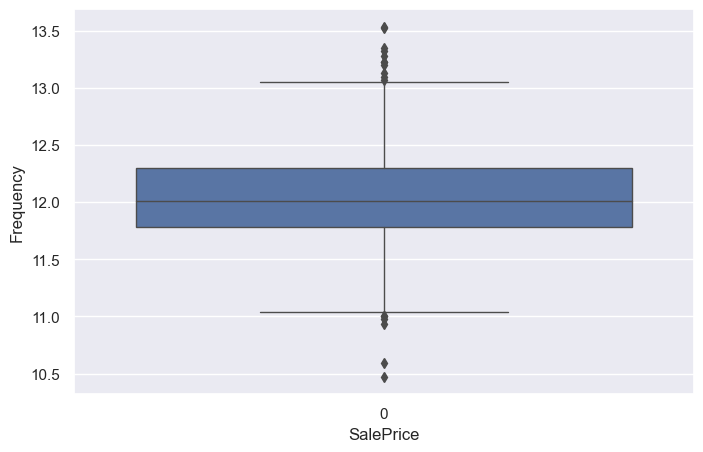

In [258]:
# Outlier Analysis

data_numeric = df0.select_dtypes(include=['float64', 'int64'])


for i in data_numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df0[i], ax=ax_box , linewidth= 1.0)

In [259]:
#Remove outliers

df0.drop(df0[df0['LotFrontage']>200].index, inplace=True)
df0.drop(df0[df0['LotArea']>100000].index, inplace=True)
df0.drop(df0[df0['MasVnrArea']>800].index, inplace=True)
df0.drop(df0[df0['BsmtFinSF1']>3000].index, inplace=True)
df0.drop(df0[df0['BsmtUnfSF']>2000].index, inplace=True)
df0.drop(df0[df0['TotalBsmtSF']>3000].index, inplace=True)
df0.drop(df0[df0['GarageArea']>1200].index, inplace=True)
df0.drop(df0[df0['WoodDeckSF']>600].index, inplace=True)
df0.drop(df0[df0['OpenPorchSF']>300].index, inplace=True)
df0.drop(df0[df0['EnclosedPorch']>200].index, inplace=True)
df0.drop(df0[df0['ScreenPorch']>200].index, inplace=True)
df0.drop(df0[df0['SalePrice']>500000].index, inplace=True)

In [260]:
#Check if few categorical fields can be removed.
#That happens if the field has single value or few distinct values with skewness towards empty values

data_object = df0.select_dtypes(include=['object'])

for i in data_object:
    print(df0[i].value_counts())
    print()
    print()

RL         799
RM         150
FV          53
RH          10
C (all)      7
Name: MSZoning, dtype: int64


Pave    1017
Grvl       2
Name: Street, dtype: int64


Reg    725
IR1    269
IR2     20
IR3      5
Name: LotShape, dtype: int64


Lvl    926
Bnk     41
HLS     40
Low     12
Name: LandContour, dtype: int64


AllPub    1019
Name: Utilities, dtype: int64


Inside     780
Corner     166
CulDSac     39
FR2         30
FR3          4
Name: LotConfig, dtype: int64


Gtl    975
Mod     40
Sev      4
Name: LandSlope, dtype: int64


NAmes      165
CollgCr    123
OldTown     78
Somerst     73
NridgHt     65
Edwards     65
Gilbert     48
SawyerW     45
NWAmes      41
Sawyer      41
Crawfor     38
BrkSide     37
Mitchel     32
Timber      27
NoRidge     25
IDOTRR      22
StoneBr     16
SWISU       16
BrDale      15
Blmngtn     14
ClearCr     11
MeadowV      9
NPkVill      7
Veenker      4
Blueste      2
Name: Neighborhood, dtype: int64


Norm      891
Feedr      49
Artery     36
RRAn       22
R

In [261]:
#Remove unwanted categorical fields

df0.drop(['Street'], axis=1, inplace=True)
df0.drop(['Utilities'], axis=1, inplace=True)


In [262]:
#Check the datatypes 

df0.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1019 non-null   int64  
 1   MSZoning       1019 non-null   object 
 2   LotFrontage    1019 non-null   float64
 3   LotArea        1019 non-null   int64  
 4   LotShape       1019 non-null   object 
 5   LandContour    1019 non-null   object 
 6   LotConfig      1019 non-null   object 
 7   LandSlope      1019 non-null   object 
 8   Neighborhood   1019 non-null   object 
 9   Condition1     1019 non-null   object 
 10  Condition2     1019 non-null   object 
 11  BldgType       1019 non-null   object 
 12  HouseStyle     1019 non-null   object 
 13  OverallQual    1019 non-null   int64  
 14  OverallCond    1019 non-null   int64  
 15  YearBuilt      1019 non-null   int64  
 16  YearRemodAdd   1019 non-null   int64  
 17  RoofStyle      1019 non-null   object 
 18  RoofMatl

### Data Preparation and Polynomial Trial

- Derived fields
- Create dummies for categorical fields
- Scale the features
- Conduct Polynomial trial to find optimal fold value for regularization

In [263]:
#Create derived field
df0['PropAge'] = (df0['YrSold'] - df0['YearBuilt'])

In [264]:
#Drop unwanted fields now that we have the derived field

df0.drop(['YrSold'], axis=1, inplace=True)
df0.drop(['YearBuilt'], axis=1, inplace=True)
df0.drop(['YearRemodAdd'], axis=1, inplace=True)

In [265]:
#Identify categorical fields for dummy creation

df0_obj = df0.select_dtypes(include=['object'])
df0_obj

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,FV,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [266]:
#Create dummy fields

df0_dummy = pd.get_dummies(df0_obj,drop_first = True)
df0_dummy

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [267]:
#Drop original categorical fields now that we have created dummies

df0.drop(list(df0_obj.columns),axis=1,inplace=True)

In [268]:
df0 = pd.concat([df0, df0_dummy], axis=1)

In [269]:
df0.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,150,856,854,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,284,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,434,920,866,...,0,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,...,0,0,0,0,1,0,0,0,1,0
5,50,85.0,14115,5,5,0.0,732,64,796,566,...,0,0,0,0,1,0,0,0,1,0


In [270]:
# Feature Scaling

scaler = MinMaxScaler()
cols = df0.columns
df1 = pd.DataFrame(scaler.fit_transform(df0[cols]))
df1.columns = cols


In [271]:
df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.273292,0.102935,0.625,0.428571,0.248731,0.322669,0.077519,0.339144,0.413559,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.366460,0.119492,0.500,0.857143,0.000000,0.446984,0.146770,0.500000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.291925,0.143246,0.625,0.428571,0.205584,0.222121,0.224289,0.364501,0.419370,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.391304,0.186580,0.750,0.428571,0.444162,0.299360,0.253230,0.453645,0.509927,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.176471,0.397516,0.184492,0.375,0.428571,0.000000,0.334552,0.033075,0.315372,0.274092,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Now we will conduct Polynomial Regression to find right fold value for Regularization

### For that we will use TotalBsmtSF as it is the numerical field with highest correlation with SalePrice

In [272]:
X = df1.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.273292,0.102935,0.625,0.428571,0.248731,0.322669,0.077519,0.339144,0.413559,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.366460,0.119492,0.500,0.857143,0.000000,0.446984,0.146770,0.500000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.291925,0.143246,0.625,0.428571,0.205584,0.222121,0.224289,0.364501,0.419370,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.391304,0.186580,0.750,0.428571,0.444162,0.299360,0.253230,0.453645,0.509927,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.176471,0.397516,0.184492,0.375,0.428571,0.000000,0.334552,0.033075,0.315372,0.274092,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [273]:
# Putting response variable to y
y = df1['SalePrice']

y.head()

0    0.582363
1    0.536881
2    0.605147
3    0.641895
4    0.458693
Name: SalePrice, dtype: float64

In [274]:
X_poly = X['TotalBsmtSF'].values.reshape(-1,1)

reg = LinearRegression() 
reg.fit(X_poly,y)

LinearRegression()

In [275]:
# Building the polynomial regression model with degree 5
degree=3 
polyreg3 = PolynomialFeatures(degree)
X_poly3 = polyreg3.fit_transform(X_poly) # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg3 = LinearRegression()
linreg3.fit(X_poly3, y)

LinearRegression()

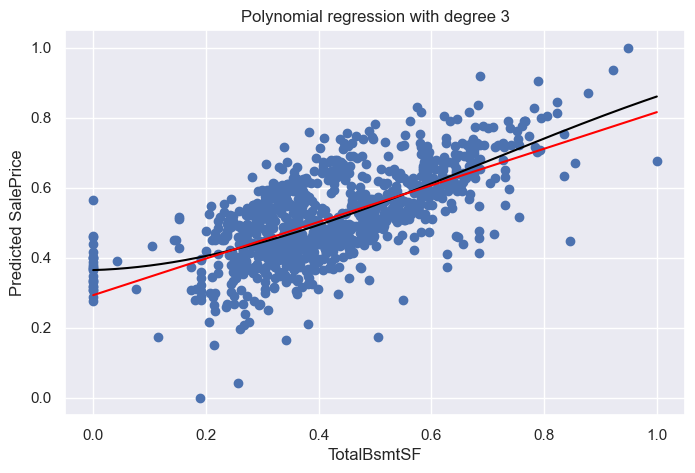

In [276]:
# Plotting the polynomial regression and simple linear regression
X_seq = np.linspace(X_poly.min(),X_poly.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
plt.figure()
plt.scatter(X_poly,y)

plt.plot(X_seq,linreg3.predict(polyreg3.fit_transform(X_seq)),color="black") # model fit with polynomial regression
plt.plot(X_seq,reg.predict(X_seq),color="red") # model fit with linear regression
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("TotalBsmtSF")
plt.ylabel("Predicted SalePrice")
plt.show()

In [277]:
# Building the polynomial regression model with degree 5
degree=5 
polyreg5 = PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X_poly) # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg5 = LinearRegression()
linreg5.fit(X_poly5, y)


LinearRegression()

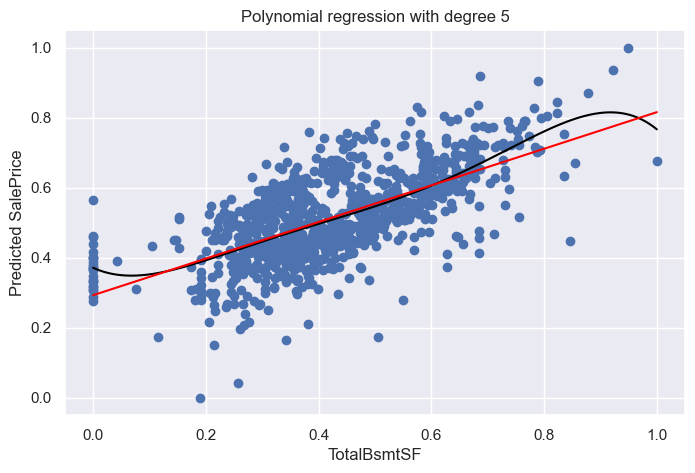

In [278]:
# Plotting the polynomial regression and simple linear regression
X_seq = np.linspace(X_poly.min(),X_poly.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
plt.figure()
plt.scatter(X_poly,y)

plt.plot(X_seq,linreg5.predict(polyreg5.fit_transform(X_seq)),color="black") # model fit with polynomial regression
plt.plot(X_seq,reg.predict(X_seq),color="red") # model fit with linear regression
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("TotalBsmtSF")
plt.ylabel("Predicted SalePrice")
plt.show()

In [279]:
# Building the polynomial regression model with degree 7
degree=7 
polyreg7 = PolynomialFeatures(degree)
X_poly7 = polyreg7.fit_transform(X_poly) # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg7 = LinearRegression()
linreg7.fit(X_poly7, y)

LinearRegression()

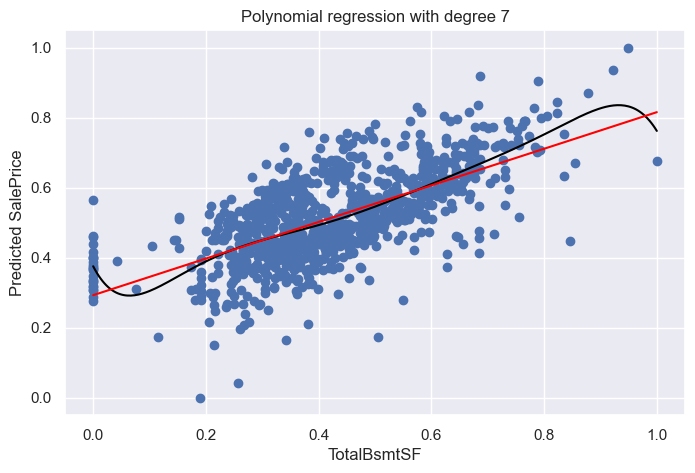

In [280]:
# Plotting the polynomial regression and simple linear regression
X_seq = np.linspace(X_poly.min(),X_poly.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
plt.figure()
plt.scatter(X_poly,y)

plt.plot(X_seq,linreg7.predict(polyreg7.fit_transform(X_seq)),color="black") # model fit with polynomial regression
plt.plot(X_seq,reg.predict(X_seq),color="red") # model fit with linear regression
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("TotalBsmtSF")
plt.ylabel("Predicted SalePrice")
plt.show()

### With the above trial it seems that 5 is a good fold value

### Prepare for Performing Regularization

- In first trial I faced error due to null value in 'MasVnrArea'. I will first remove it after analysis
- Split into train and test dataset

In [283]:
df1.columns[df1.isna().any()] 

null_df = df0.isna().sum()/len(df0)*100
null_df = null_df[null_df>0]
null_df.sort_values(inplace=True, ascending=False)
null_df

MasVnrArea    0.588813
dtype: float64

In [284]:
df1['MasVnrArea'].value_counts()/len(df1['MasVnrArea'])*100

0.000000    58.684985
0.020305     0.686948
0.137056     0.686948
0.091371     0.588813
0.101523     0.588813
              ...    
0.713198     0.098135
0.112944     0.098135
0.361675     0.098135
0.753807     0.098135
0.151015     0.098135
Name: MasVnrArea, Length: 247, dtype: float64

In [285]:
df1.drop(['MasVnrArea'], axis=1, inplace=True)

In [286]:
# Split into test and train data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y,train_size=0.7,test_size = 0.3, random_state=100)

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge Regularization

- Perform Ridge
- Identify best parameter for alpha
- Check accuracy for best parameter and twice of best parameter

In [288]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [289]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [290]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

from sklearn.metrics import r2_score

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9999999982254203

In [291]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9999999800182012

### The trial and test score are almost same. Now let's identify top variables for Ridge

In [292]:
# Ridge model parameters
ridge_prm= list(ridge.coef_)
ridge_prm = [round(x, 3) for x in ridge_prm]
cols = X.columns
list(zip(cols, ridge_prm))

[('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('BsmtFullBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.999),
 ('PropAge', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', 0.0),
 ('LotConfig_Inside', 0.0),
 ('LandSlope_Mod', -0.0),
 ('LandSlope_Sev', 0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDal

In [293]:
# Create a dataframe for Ridge Coefficients
ridge_coeff = list(zip(cols, ridge_prm))
df_coeff = pd.DataFrame(ridge_coeff)
df_coeff.columns = ['Variable', 'Coeff']
df_coeff['abs_Coeff'] = df_coeff['Coeff'].apply(lambda x: x if x>=0 else -1*x)
df_coeff = df_coeff.sort_values((['abs_Coeff']), axis = 0, ascending = False)
df_coeff.head(10)

,Variable,Coeff,abs_Coeff
22,PoolArea,0.999,0.999
0,MSSubClass,-0.000,-0.000
128,ExterCond_Fa,0.000,0.000
130,ExterCond_TA,-0.000,-0.000
131,Foundation_CBlock,0.000,0.000
132,Foundation_PConc,0.000,0.000
133,Foundation_Slab,0.000,0.000
134,Foundation_Stone,0.000,0.000
135,Foundation_Wood,0.000,0.000
136,BsmtQual_Fa,0.000,0.000


### We now run the model with twice the alpha

In [294]:
alpha = 0.0002
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9999999929056751

In [295]:
alpha = 0.0002
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9999999203721487

In [296]:
# Ridge model parameters

ridge_prm= list(ridge.coef_)
ridge_prm = [round(x, 3) for x in ridge_prm]
cols = X.columns
list(zip(cols, ridge_prm))

[('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('BsmtFullBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.998),
 ('PropAge', -0.0),
 ('MSZoning_FV', 0.001),
 ('MSZoning_RH', 0.001),
 ('MSZoning_RL', 0.001),
 ('MSZoning_RM', 0.001),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', 0.0),
 ('LotConfig_Inside', 0.0),
 ('LandSlope_Mod', -0.0),
 ('LandSlope_Sev', 0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborho

In [297]:
# Create a dataframe for Ridge Coefficients

ridge_coeff = list(zip(cols, ridge_prm))
df_coeff = pd.DataFrame(ridge_coeff)
df_coeff.columns = ['Variable', 'Coeff']
df_coeff['abs_Coeff'] = df_coeff['Coeff'].apply(lambda x: x if x>=0 else -1*x)
df_coeff = df_coeff.sort_values((['abs_Coeff']), axis = 0, ascending = False)
df_coeff.head(10)

,Variable,Coeff,abs_Coeff
22,PoolArea,0.998,0.998
27,MSZoning_RM,0.001,0.001
26,MSZoning_RL,0.001,0.001
25,MSZoning_RH,0.001,0.001
24,MSZoning_FV,0.001,0.001
134,Foundation_Stone,0.001,0.001
139,BsmtCond_Gd,-0.000,-0.000
131,Foundation_CBlock,0.000,0.000
132,Foundation_PConc,0.000,0.000
133,Foundation_Slab,0.000,0.000


### With twice alpha the accuracy has changed marginally. But in the list of top 5 variables we now see that variables 2,3,4 and 5 have changed

### Lasso Regularization

- Perform Lasso
- Identify best parameter for alpha
- Check accuracy for best parameter and twice of best parameter
- Drop the top 5 variables and create new model

In [298]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

ridge = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [299]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [300]:
alpha = 0.0001
ridge = Lasso(alpha=alpha)

ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9999431468731166

In [301]:
alpha = 0.0001
ridge = Lasso(alpha=alpha)

ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9999416154078966

### The test and trial accuracy are almost same. Let's identify top variables

In [302]:
# Lasso model parameters

ridge_prm= list(ridge.coef_)
ridge_prm = [round(x, 3) for x in ridge_prm]
cols = X.columns
list(zip(cols, ridge_prm))

[('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('BsmtFullBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.988),
 ('PropAge', -0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('LandSlope_Mod', 0.0),
 ('LandSlope_Sev', 0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDa

In [303]:
# Create a dataframe for Lasso Coefficients

ridge_coeff = list(zip(cols, ridge_prm))
df_coeff = pd.DataFrame(ridge_coeff)
df_coeff.columns = ['Variable', 'Coeff']
df_coeff['abs_Coeff'] = df_coeff['Coeff'].apply(lambda x: x if x>=0 else -1*x)
df_coeff = df_coeff.sort_values((['abs_Coeff']), axis = 0, ascending = False)
df_coeff.head(10)

,Variable,Coeff,abs_Coeff
22,PoolArea,0.988,0.988
127,ExterQual_TA,-0.001,0.001
128,ExterCond_Fa,-0.000,-0.000
130,ExterCond_TA,0.000,0.000
131,Foundation_CBlock,-0.000,-0.000
132,Foundation_PConc,0.000,0.000
133,Foundation_Slab,-0.000,-0.000
134,Foundation_Stone,-0.000,-0.000
135,Foundation_Wood,0.000,0.000
136,BsmtQual_Fa,-0.000,-0.000


### Now run the model with twice the alpha

In [304]:
alpha = 0.0002
ridge = Lasso(alpha=alpha)

ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9997751004269392

In [305]:
alpha = 0.0002
ridge = Lasso(alpha=alpha)

ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9997630730388448

In [306]:
# Ridge model parameters
ridge_prm= list(ridge.coef_)
ridge_prm = [round(x, 3) for x in ridge_prm]
cols = X.columns
list(zip(cols, ridge_prm))

[('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('BsmtFullBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.976),
 ('PropAge', -0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.001),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('LandSlope_Mod', 0.0),
 ('LandSlope_Sev', 0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_Br

In [307]:
# Create a dataframe for Lasso Coefficients

ridge_coeff = list(zip(cols, ridge_prm))
df_coeff = pd.DataFrame(ridge_coeff)
df_coeff.columns = ['Variable', 'Coeff']
df_coeff['abs_Coeff'] = df_coeff['Coeff'].apply(lambda x: x if x>=0 else -1*x)
df_coeff = df_coeff.sort_values((['abs_Coeff']), axis = 0, ascending = False)
df_coeff.head(10)

,Variable,Coeff,abs_Coeff
22,PoolArea,0.976,0.976
26,MSZoning_RL,0.001,0.001
146,BsmtFinType1_GLQ,0.001,0.001
180,GarageFinish_Unf,-0.001,0.001
168,KitchenQual_TA,-0.001,0.001
127,ExterQual_TA,-0.001,0.001
147,BsmtFinType1_LwQ,0.000,0.000
145,BsmtFinType1_BLQ,0.000,0.000
129,ExterCond_Gd,-0.000,-0.000
150,BsmtFinType2_BLQ,-0.000,-0.000


### There's marginal change in the accuracy. But in the list of top 5 variables we see different variable for variables 2,3,4 and 5


### Now we perform Lasso after deleting the top 5 variables

In [308]:
X_train.drop(['PoolArea'], axis=1, inplace=True)
X_train.drop(['MSZoning_RL'], axis=1, inplace=True)
X_train.drop(['BsmtFinType1_GLQ'], axis=1, inplace=True)
X_train.drop(['GarageFinish_Unf'], axis=1, inplace=True)
X_train.drop(['KitchenQual_TA'], axis=1, inplace=True)

X_test.drop(['PoolArea'], axis=1, inplace=True)
X_test.drop(['MSZoning_RL'], axis=1, inplace=True)
X_test.drop(['BsmtFinType1_GLQ'], axis=1, inplace=True)
X_test.drop(['GarageFinish_Unf'], axis=1, inplace=True)
X_test.drop(['KitchenQual_TA'], axis=1, inplace=True)

In [309]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

ridge = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [310]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [311]:
alpha = 0.0001
ridge = Lasso(alpha=alpha)

ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9999456627956039

In [312]:
alpha = 0.0001
ridge = Lasso(alpha=alpha)

ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.999943868784936

In [313]:
# Ridge model parameters
ridge_prm= list(ridge.coef_)
ridge_prm = [round(x, 3) for x in ridge_prm]
cols = X.columns
list(zip(cols, ridge_prm))

[('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('BsmtFullBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.989),
 ('PoolArea', -0.0),
 ('PropAge', -0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', 0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', -0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', 0.0),
 ('LotConfig_Inside', 0.0),
 ('LandSlope_Mod', -0.0),
 ('LandSlope_Sev', -0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_B

In [314]:
# Create a dataframe for Lasso Coefficients

ridge_coeff = list(zip(cols, ridge_prm))
df_coeff = pd.DataFrame(ridge_coeff)
df_coeff.columns = ['Variable', 'Coeff']
df_coeff['abs_Coeff'] = df_coeff['Coeff'].apply(lambda x: x if x>=0 else -1*x)
df_coeff = df_coeff.sort_values((['abs_Coeff']), axis = 0, ascending = False)
df_coeff.head(10)

,Variable,Coeff,abs_Coeff
21,ScreenPorch,0.989,0.989
125,ExterQual_Fa,-0.001,0.001
0,MSSubClass,-0.000,-0.000
136,BsmtQual_Fa,-0.000,-0.000
127,ExterQual_TA,-0.000,-0.000
128,ExterCond_Fa,0.000,0.000
129,ExterCond_Gd,-0.000,-0.000
130,ExterCond_TA,0.000,0.000
131,Foundation_CBlock,-0.000,-0.000
132,Foundation_PConc,-0.000,-0.000


## Summary

- Ridge and Lasso have similar accuracy
- Given that I will proceed with Lasso and alpha as 0.0002 because:
    - (a) The accuracy difference between Lasso and Ridge is insignificant
    - (b) Lasso is also choosing variables that make business sense i.e. MSZoning, Basement Finishing, Foundation Stone, Exterior Quality